<a href="https://www.kaggle.com/code/machineelearning1/wshr-ne-etf-stock-market-price-prediction?scriptVersionId=161054530" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wshr-ne/weekly.csv
/kaggle/input/wshr-ne/monthly.csv
/kaggle/input/wshr-ne/daily.csv


In [2]:
df_D = pd.read_csv("/kaggle/input/wshr-ne/daily.csv")
df_W = pd.read_csv("/kaggle/input/wshr-ne/weekly.csv")
df_M = pd.read_csv("/kaggle/input/wshr-ne/monthly.csv")
# mid = int(df.shape[0] / 2)
df_D.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-12,25.000000,25.040001,24.969999,24.969999,24.150352,2612015
1,2021-05-13,25.180000,25.340000,25.180000,25.299999,24.469522,78701
2,2021-05-14,25.400000,25.469999,25.219999,25.469999,24.633940,5574
3,2021-05-17,25.459999,25.459999,25.290001,25.340000,24.508207,22863
4,2021-05-18,25.520000,25.520000,25.295000,25.295000,24.464684,15563
5,2021-05-19,25.299999,25.389999,25.120001,25.389999,24.556568,24455
6,2021-05-20,25.480000,26.730000,25.450001,25.570000,24.730658,36605
7,2021-05-21,25.660000,25.660000,25.520000,25.520000,24.682301,27347
8,2021-05-25,25.740000,25.740000,25.670000,25.709999,24.866060,25482
9,2021-05-26,25.980000,25.980000,25.790001,25.870001,25.020813,15612


In [3]:
df_D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       663 non-null    object 
 1   Open       663 non-null    float64
 2   High       663 non-null    float64
 3   Low        663 non-null    float64
 4   Close      663 non-null    float64
 5   Adj Close  663 non-null    float64
 6   Volume     663 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 36.4+ KB


In [4]:
df_D.describe()
# As per count: Total Number of Non-Empty values, there's no need to clean any empty data

,Open,High,Low,Close,Adj Close,Volume
count,663.000000,663.000000,663.000000,663.000000,663.000000,6.630000e+02
mean,26.307919,26.385354,26.202768,26.280897,25.753425,1.551195e+04
std,1.433990,1.429967,1.412303,1.412703,1.385276,1.048732e+05
min,22.750000,22.750000,22.629999,22.750000,22.245880,0.000000e+00
25%,25.549999,25.735000,25.490000,25.559999,24.935634,4.442500e+03
50%,26.500000,26.570000,26.379999,26.459999,25.951191,8.191000e+03
75%,27.275000,27.345000,27.150000,27.214999,26.842751,1.318900e+04
max,29.370001,29.370001,29.170000,29.260000,28.425110,2.612015e+06


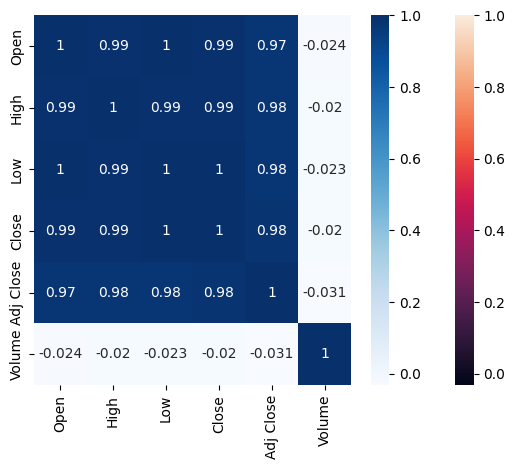

In [5]:
import seaborn as sns
corr = df_D.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(corr)

cmap = sns.heatmap(corr, cmap="Blues", annot=True)

# def magnify():
#     return [dict(selector="th",
#                  props=[("font-size", "7pt")]),
#             dict(selector="td",
#                  props=[('padding', "0em 0em")]),
#             dict(selector="th:hover",
#                  props=[("font-size", "12pt")]),
#             dict(selector="tr:hover td:hover",
#                  props=[('max-width', '200px'),
#                         ('font-size', '12pt')])
# ]

# corr.style.background_gradient(cmap, axis=1)\
#     .format(precision=3)\
#     .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
#     .set_caption("Hover to magify")\
#     .set_table_styles(magnify())

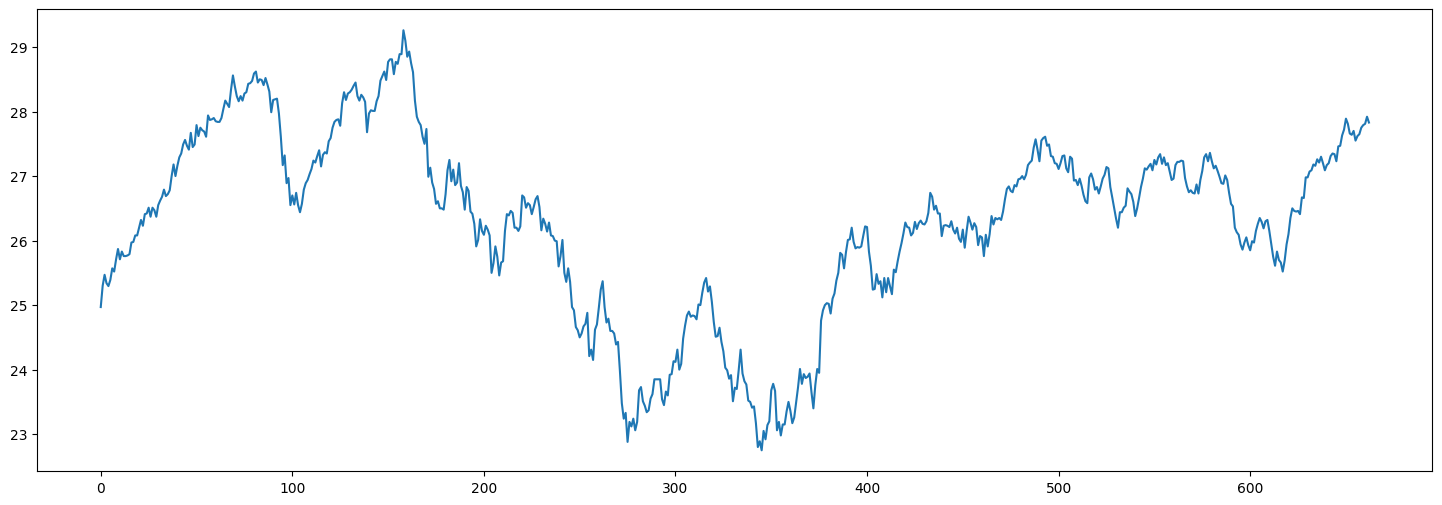

In [6]:
import matplotlib.pyplot as plt_D
from matplotlib.pyplot import figure
figure(figsize=(18, 6), dpi=100)
plt_D.plot(df_D.Close)
plt_D.show()

In [7]:
import plotly.express as px
figure = px.bar(df_D, x = "Date", y= "Close",title= 'WSHR.NE Daily Data')
figure.show()

In [8]:
figure = px.line(df_D, x='Date', y='Close', 
                 title='WSHR.NE Analysis with Rangeslider')
figure.update_xaxes(rangeslider_visible=True)
figure.show()

In [9]:
figure = px.line(df_D, x='Date', y='Close', 
                 title='Stock Market ETF Analysis with Time Period Selectors')

figure.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
figure.show()

In [10]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_D, test_size = 0.2)
train.sort_values(by=['Date'], inplace=True)
test.sort_values(by=['Date'], inplace=True)
test_pred_ln = test.copy()
test_pred_rf = test.copy()
test_pred_ln

,Date,Open,High,Low,Close,Adj Close,Volume
6,2021-05-20,25.480000,26.730000,25.450001,25.570000,24.730658,36605
8,2021-05-25,25.740000,25.740000,25.670000,25.709999,24.866060,25482
9,2021-05-26,25.980000,25.980000,25.790001,25.870001,25.020813,15612
10,2021-05-27,25.879999,25.879999,25.709999,25.709999,24.866060,44004
13,2021-06-01,25.980000,25.980000,25.719999,25.760000,24.914423,30833
...,...,...,...,...,...,...,...
638,2023-11-27,27.820000,27.820000,27.139999,27.200001,27.088940,24351
644,2023-12-05,27.350000,27.350000,27.299999,27.340000,27.228367,5403
647,2023-12-08,27.240000,27.469999,27.240000,27.469999,27.357836,11145
648,2023-12-11,26.900000,27.590000,26.900000,27.629999,27.517181,17508


In [11]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

y_train = train['Close'].values
y_test = test['Close'].values

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# linear Regression
model_lnr = LinearRegression()
model_lnr.fit(x_train, y_train)
ln_pred = model_lnr.predict(x_test)

# linear RandomForestRegressor
model = RandomForestRegressor(n_estimators=500, random_state=42, max_depth=10)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

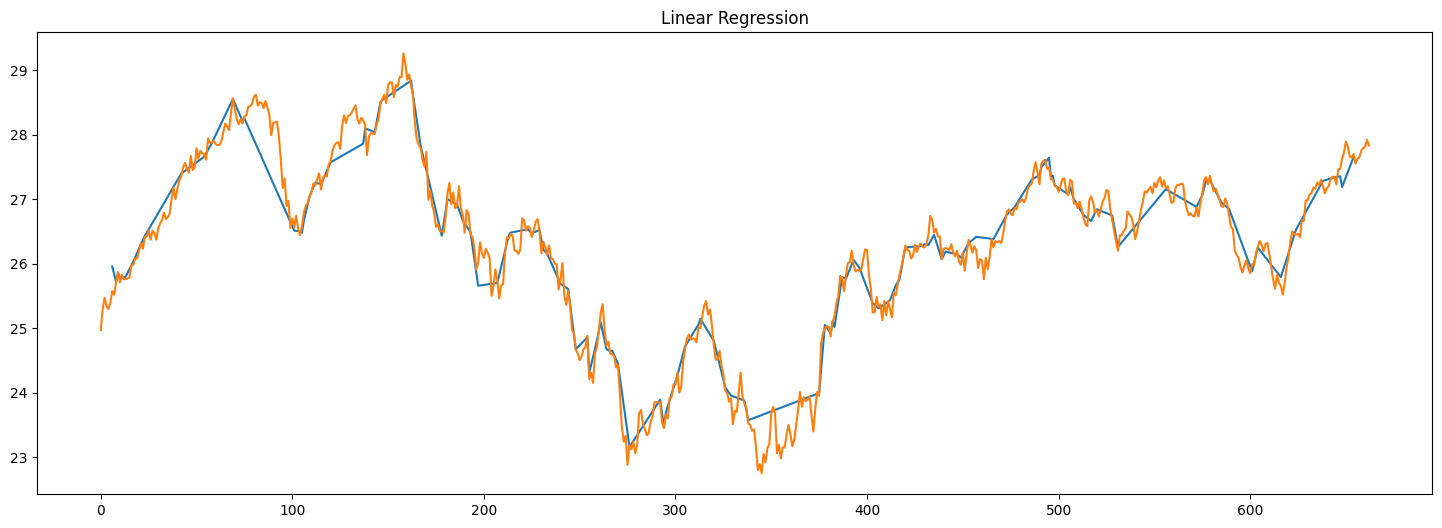

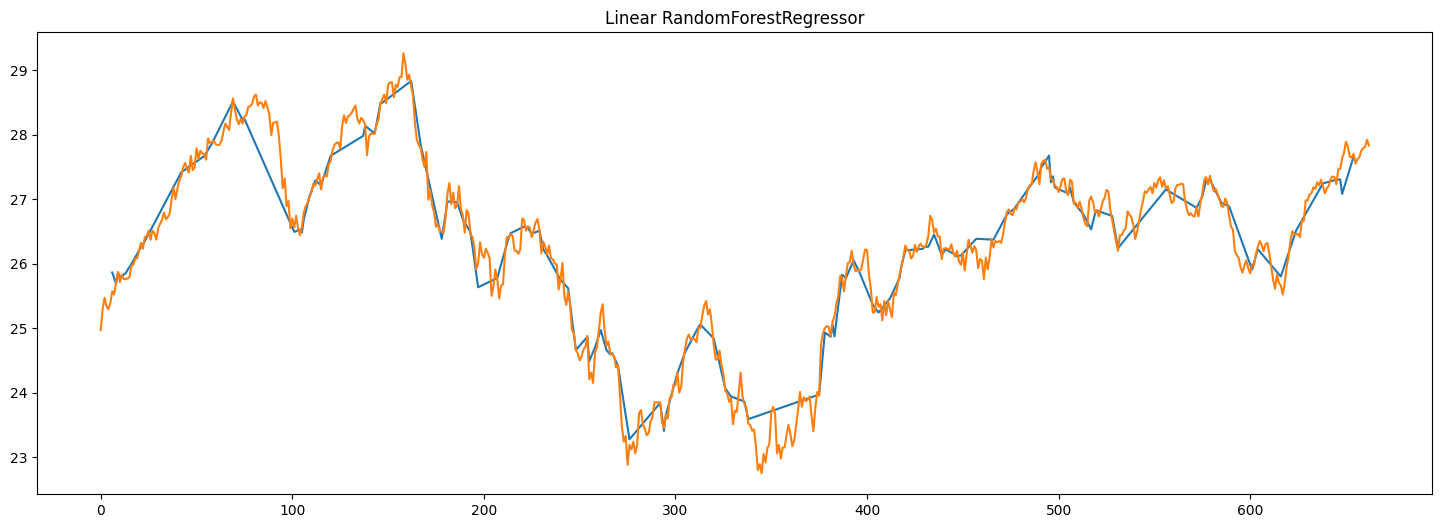

In [13]:
from matplotlib.pyplot import figure
test_pred_ln['Close_Prediction'] = ln_pred
DF_ln = test_pred_ln[['Close_Prediction', 'Date']]

test_pred_rf['Close_Prediction'] = y_pred
DF_rf = test_pred_rf[['Close_Prediction', 'Date']]

figure(figsize=(18, 6), dpi=100)
plt_D.plot(DF_ln.Close_Prediction)
plt_D.plot(df_D.Close)
plt_D.title("Linear Regression") 
plt_D.show()

figure(figsize=(18, 6), dpi=100)
plt_D.plot(DF_rf.Close_Prediction)
plt_D.plot(df_D.Close)
plt_D.title("Linear RandomForestRegressor") 
plt_D.show()

In [14]:
from sklearn import metrics

print("WSNHR Prediction Model Scores:")
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}')
print(f'Test Score : {model.score(x_test, y_test) * 100:.2f}%')

print("")
print("Linear Regression:")
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, ln_pred), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, ln_pred), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, ln_pred)), 4))

print("")
print("Random Tree Regression:")
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, y_pred), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, y_pred), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 4))

print("")
errors = abs(y_pred - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '% using Random Tree Regressor.') 

print("")
errors = abs(ln_pred - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '% using Linear Regressor.') 

WSNHR Prediction Model Scores:
Train Score : 99.93
Test Score : 99.11%

Linear Regression:
Mean Absolute Error: 0.068
Mean Squared Error: 0.0103
Root Mean Squared Error: 0.1017

Random Tree Regression:
Mean Absolute Error: 0.0743
Mean Squared Error: 0.013
Root Mean Squared Error: 0.114

Accuracy: 99.72 % using Random Tree Regressor.

Accuracy: 99.74 % using Linear Regressor.
